2023-05-19    1069.591845
2023-05-20    1068.859268
2023-05-21    1068.092896
2023-05-22    1067.324224
2023-05-23    1066.558975
2023-05-24    1065.798351
2023-05-25    1065.042640
2023-05-26    1064.291909
2023-05-27    1063.546160
2023-05-28    1062.805374
2023-05-29    1062.069521
2023-05-30    1061.338573
2023-05-31    1060.612495
2023-06-01    1059.891257
2023-06-02    1059.174826
2023-06-03    1058.463171
2023-06-04    1057.756258
2023-06-05    1057.054058
2023-06-06    1056.356537
2023-06-07    1055.663666
2023-06-08    1054.975413
2023-06-09    1054.291747
2023-06-10    1053.612638
2023-06-11    1052.938056
2023-06-12    1052.267969
2023-06-13    1051.602349
2023-06-14    1050.941166
2023-06-15    1050.284389
2023-06-16    1049.631990
2023-06-17    1048.983940
Freq: D, Name: Lần cuối, dtype: float64


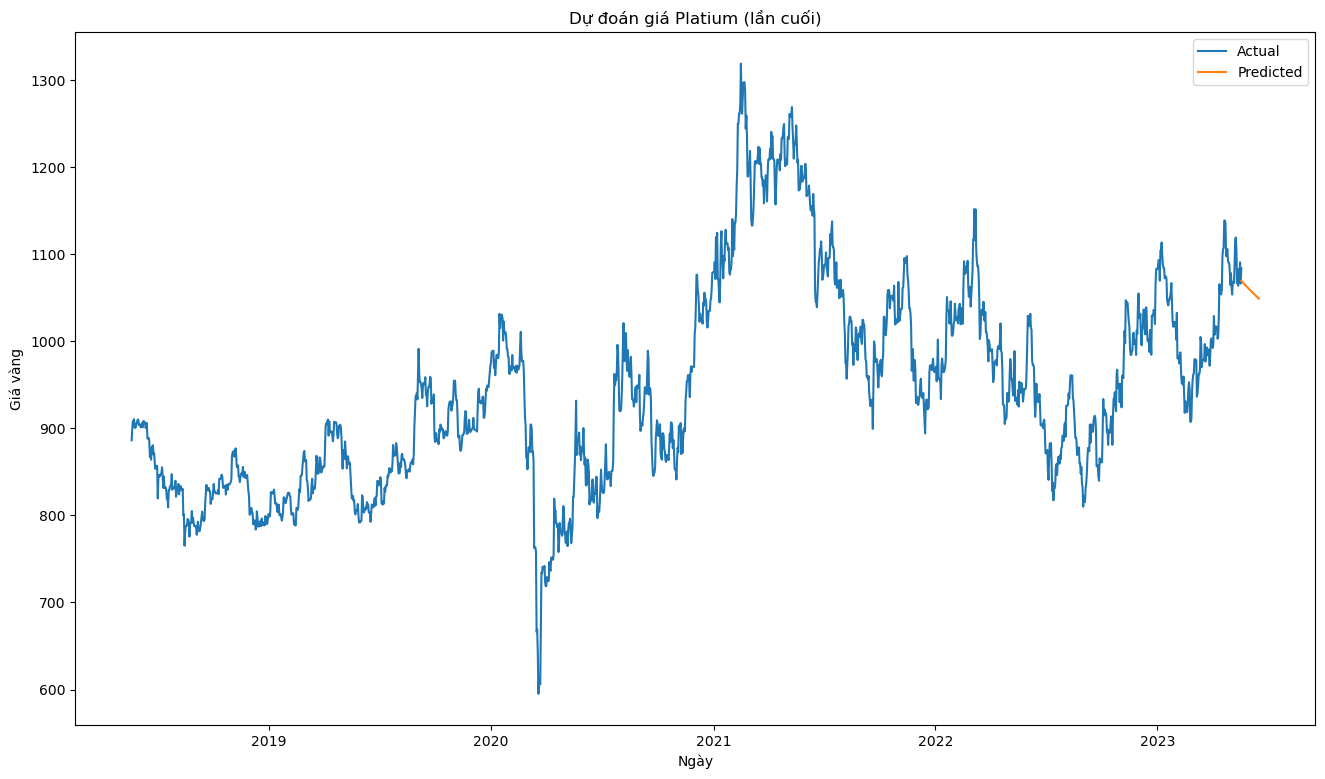

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_Platium = pd.read_csv("./data/PlatiumData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_Platium = data_Platium.drop('KL', axis=1)
data_Platium.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_Platium = data_Platium.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 7:2:1
train_size = int(len(data_Platium) * 0.7)
val_size = int(len(data_Platium) * 0.1)  # 10% dữ liệu cho tập validate
test_size = len(data_Platium) - train_size - val_size

train_data = data_Platium[:train_size].copy()
val_data = data_Platium[train_size:train_size+val_size].copy()
test_data = data_Platium[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_Platium.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_Platium.columns)
predicted_Platium_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_Platium_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_Platium.index, data_Platium['Lần cuối'], label='Actual')
plt.plot(predicted_Platium_prices.index, predicted_Platium_prices, label='Predicted')
plt.title('Dự đoán giá Platium (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()


## Đánh giá mô hình

In [2]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_Platium_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_Platium_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_Platium_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 14.208154842306158
Root Mean Squared Error (RMSE): 14.208154842306158
Mean Absolute Percentage Error (MAPE): 1.3109572653908617
